


# TITLE: DATA WRANGLING TO ANALYSIS COVID DATA








# NAME: JUDE TOCHUKWU OGBOZOR









# DATE: 09th AUGUST, 2021

### INTRODUCTION

Data wrangling, sometimes referred to as data munging or cleaning, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data. Data analysts typically spend the majority of their time in the process of data wrangling compared to the actual analysis of the data.

data source: https://ourworldindata.org/covid-deaths


- **Data Discovery:** This is an all-encompassing term that describes understanding what your data is all about. In this first step, you get familiar with your data

- **Data Structuring:** When you collect raw data, it initially is in all shapes and sizes, and has no definite structure. Such data needs to be restructured to suit the analytical model that your enterprise plans to deploy

- **Data Cleaning:** Raw data comes with some errors that need to be fixed before data is passed on to the next stage. Cleaning involves the tackling of outliers, making corrections, or deleting bad data completely

- **Data Enriching:** By this stage, you have kind of become familiar with the data in hand. Now is the time to ask yourself this question – do you need to embellish the raw data? Do you want to augment it with other data?

- **Data Validating:** This activity surfaces data quality issues, and they have to be addressed with the necessary transformations. The rules of validation rules require repetitive programming steps to check the authenticity and the quality of your data

- **Data Publishing:** Once all the above steps are completed, the final output of your data wrangling efforts are pushed downstream for your analytics needs

#### OBJECTIVES
- Collection of data from recognised world data site
- How continents respond to vaccination
- Death rate of different countries under review
- How different countries responded to vaccination


#import library
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
# read the file and load the data

df = pd.read_csv("before-wrangling-covid-data.csv")

In [3]:
#data exploratory
print(df.shape)
print(df.describe)
df.head()


(163090, 67)
<bound method NDFrame.describe of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
163085      ZWE    Africa     Zimbabwe  2022-02-15     231603.0        0.0   
163086      ZWE    Africa     Zimbabwe  2022-02-16     232213.0      610.0   
163087      ZWE    Africa     Zimbabwe  2022-02-17     232598.0      385.0   
163088      ZWE    Africa     Zimbabwe  2022-02-18     233030.0      432.0   
163089      ZWE    Africa     Zimbabwe  2022-02-19     233224.0      194.0   

        new_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
#copy and use the df without affecting the main df
df_copy=df.copy()

In [5]:
#list the columns help you to see all of them easily and make decisions
df_copy.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# filter the column you want to use
analysis_col=['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths',
             'new_tests', 'total_tests','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters','population','median_age', 'aged_65_older',
       'aged_70_older','female_smokers',
       'male_smokers']
df1=df_copy.filter(analysis_col)


In [7]:
#replace space with NAN

df1.replace(" ", np.nan, inplace = True )
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,2.581,1.337,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,2.581,1.337,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,2.581,1.337,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,2.581,1.337,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,18.6,2.581,1.337,NaN,NaN


In [8]:
#check for missing value

missing_data=df1.isnull()
missing_data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
0,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
1,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
2,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
3,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
4,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163085,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
163086,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
163087,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
163088,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#counting the values in a column

for column in df1.columns.values.tolist():
    print(column)
    print(df1[column].value_counts())
    print("")

iso_code
ARG    781
MEX    781
THA    778
TWN    766
USA    760
      ... 
PLW    182
TUV    179
NIU    157
TKL    114
PCN     85
Name: iso_code, Length: 238, dtype: int64

continent
Africa           38647
Europe           36375
Asia             35528
North America    24438
South America     9335
Oceania           8993
Name: continent, dtype: int64

location
Argentina        781
Mexico           781
Thailand         778
Taiwan           766
United States    760
                ... 
Palau            182
Tuvalu           179
Niue             157
Tokelau          114
Pitcairn          85
Name: location, Length: 238, dtype: int64

date
2021-08-27    238
2021-08-26    238
2021-08-22    238
2021-08-23    238
2021-08-24    238
             ... 
2020-01-08      3
2020-01-07      3
2020-01-03      2
2020-01-01      2
2020-01-02      2
Name: date, Length: 781, dtype: int64

total_cases
1.0         1772
4.0         1331
3.0         1026
2.0          894
721.0        698
            ... 
853841.0 

In [10]:
#to determine how many Nan cells on each column

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

iso_code
False    163090
Name: iso_code, dtype: int64

continent
False    153316
True       9774
Name: continent, dtype: int64

location
False    163090
Name: location, dtype: int64

date
False    163090
Name: date, dtype: int64

total_cases
False    160098
True       2992
Name: total_cases, dtype: int64

new_cases
False    160033
True       3057
Name: new_cases, dtype: int64

total_deaths
False    142384
True      20706
Name: total_deaths, dtype: int64

new_deaths
False    142548
True      20542
Name: new_deaths, dtype: int64

new_tests
True     96872
False    66218
Name: new_tests, dtype: int64

total_tests
True     95014
False    68076
Name: total_tests, dtype: int64

total_vaccinations
True     119486
False     43604
Name: total_vaccinations, dtype: int64

people_vaccinated
True     121595
False     41495
Name: people_vaccinated, dtype: int64

people_fully_vaccinated
True     124230
False     38860
Name: people_fully_vaccinated, dtype: int64

total_boosters
True     146790
False   

In [11]:
#set date as index
df1.set_index("date",inplace=True)

In [12]:
#there are columns by commonsense are not supposed to be empty such as, date,continent,location,iso-code
col_2_dropna=['continent','total_cases', 'new_cases','total_deaths', 'new_deaths',
             'new_tests', 'total_tests','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters','population','median_age', 'aged_65_older',
       'aged_70_older','female_smokers',
       'male_smokers']
df1.dropna(subset=(col_2_dropna), axis=0,inplace=True)
df1


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
date,,,,,,,,,,,,,,,,,,,
2021-11-03,ALB,Europe,Albania,186793.0,571.0,2940.0,3.0,4132.0,1273211.0,1926604.0,1025180.0,898625.0,2799.0,2872934.0,38.0,13.188,8.643,7.1,51.2
2021-11-06,ALB,Europe,Albania,187994.0,0.0,2948.0,0.0,3150.0,1283530.0,1944676.0,1031588.0,904858.0,8230.0,2872934.0,38.0,13.188,8.643,7.1,51.2
2021-11-07,ALB,Europe,Albania,189125.0,1131.0,2955.0,7.0,2659.0,1286189.0,1947148.0,1032457.0,905876.0,8815.0,2872934.0,38.0,13.188,8.643,7.1,51.2
2021-11-09,ALB,Europe,Albania,190125.0,770.0,2970.0,4.0,3393.0,1291543.0,1963359.0,1037546.0,910845.0,14968.0,2872934.0,38.0,13.188,8.643,7.1,51.2
2021-11-10,ALB,Europe,Albania,190815.0,690.0,2975.0,5.0,3596.0,1295139.0,1971973.0,1040015.0,913524.0,18434.0,2872934.0,38.0,13.188,8.643,7.1,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,ZWE,Africa,Zimbabwe,229096.0,153.0,5324.0,3.0,3882.0,1839994.0,7597513.0,4257075.0,3285799.0,54639.0,15092171.0,19.6,2.822,1.882,1.6,30.7
2022-01-28,ZWE,Africa,Zimbabwe,229333.0,237.0,5333.0,9.0,3560.0,1843554.0,7614008.0,4263356.0,3291257.0,59395.0,15092171.0,19.6,2.822,1.882,1.6,30.7
2022-01-29,ZWE,Africa,Zimbabwe,229415.0,82.0,5333.0,0.0,2548.0,1846102.0,7621548.0,4266023.0,3294764.0,60761.0,15092171.0,19.6,2.822,1.882,1.6,30.7


<IPython.core.display.Javascript object>


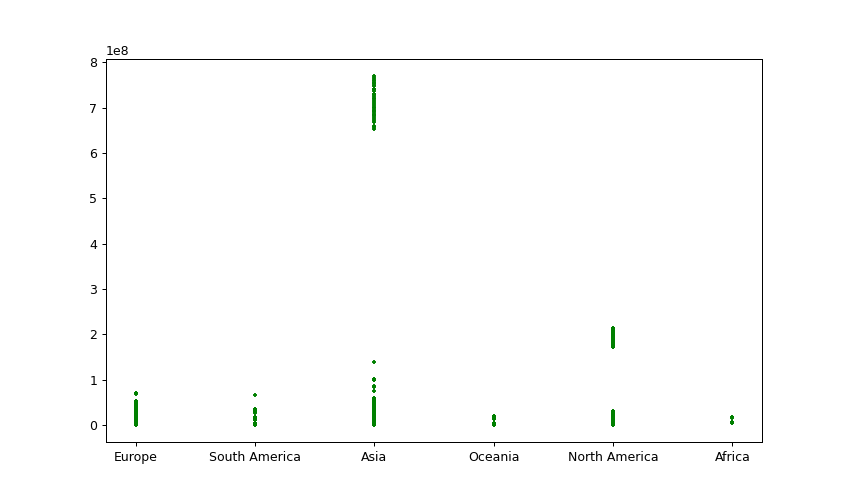

In [13]:
%matplotlib notebook
plt.scatter(x='continent', y='people_fully_vaccinated', data=df1, c='g', marker="+", s=15)


<IPython.core.display.Javascript object>


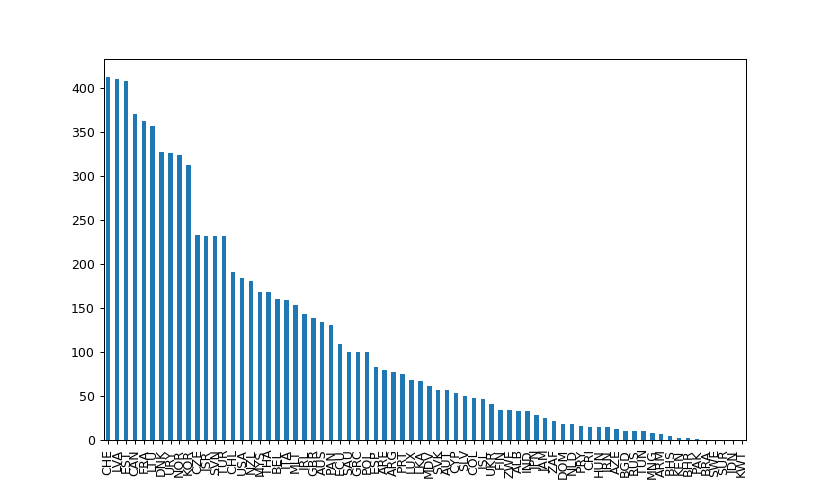

<AxesSubplot:>

In [14]:
#the country that has the most daily case of new_case and new_deaths
plt.figure()
df1.iso_code.value_counts().plot(kind="bar")

<IPython.core.display.Javascript object>


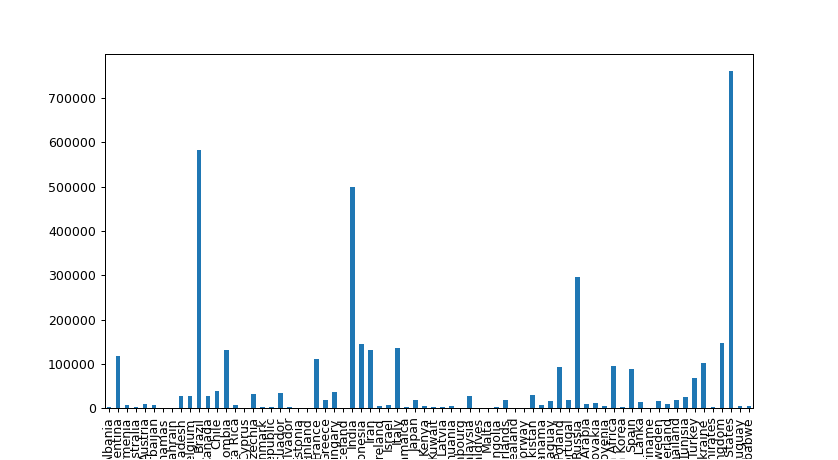

<AxesSubplot:xlabel='location'>

In [15]:
#showing countries with their death rate
plt.figure()
df1.groupby(['location'])[ 'total_deaths'].mean().plot(kind="bar")

<IPython.core.display.Javascript object>


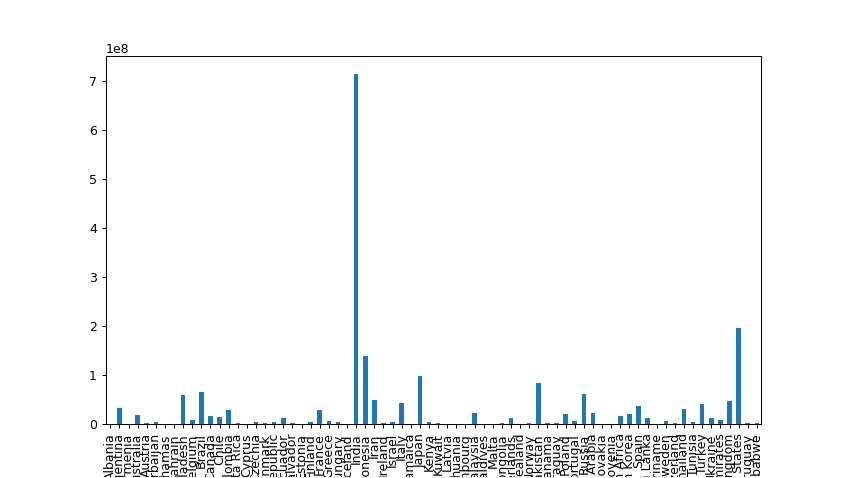

<AxesSubplot:xlabel='location'>

In [16]:
#showing countries with their death rate
plt.figure()
df1.groupby(['location'])[ 'people_fully_vaccinated'].mean().plot(kind="bar")

In [17]:
#export the data as excel and rename
df1.to_csv("Wrangled_Covid_data.csv")

### DISCUSSION
this analysis after wrangling, considered data from 
1. It is obvious that Africa and Oceanic have the least of people fully vaccinated. Their death rate is also significantly high.
2. United states has the highest death rate followed by Brazil and india.
3. Meanwhile Indian has the highest number of fully vaccinated people

### CONCLUSION

African remains the lowest affected covid continent and subsequently the least to patronise the vaccination. There may not be need to impose strict measures like travel bans on people coming from this area.

United states seems to have some propaganda in all this covid cases as despite the high death rate, their vaccination rate is not the highest as could have expected.

with the exported wrangled data, we can easily use other visualization tools like cognos, tableau to make our dashboard more presentable.

